姓名：赵永权<br>
学号：2016011715<br>
学院：软件学院<br>
专业：软件工程<br>

实训作业二：TensorFlow Schoolwork

In [24]:
# 导入必要的模型包
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# 加载鸢尾花数据集
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
label = iris.target
feature_names = iris.feature_names

In [26]:
# 将鸢尾花数据集划分成训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label,
                                                    test_size=0.2,shuffle=True,random_state=6)

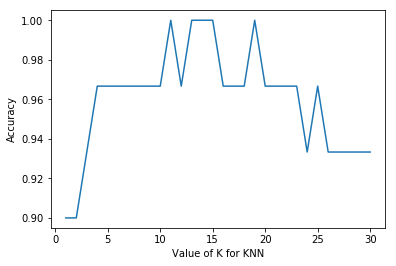

In [28]:
# 构建模型，也就是计算输入测试样本和所有训练样本之间的距离
# x为训练集的占位符，ｘ_为一个验证样本的占位符
x = tf.placeholder(tf.float32, shape=[None, 4])
x_ = tf.placeholder(tf.float32, shape=[4])
dist = tf.sqrt(tf.reduce_sum(tf.abs(tf.add(x, tf.negative(x_))), 1))
# 训练模型
def train_knn(K): #超参数K
    with tf.Session() as sess:
        pred = [] #存放所有测试样本的预测类别
        for i in range(len(X_test)):
            dist_mat = sess.run(dist, feed_dict={x:X_train, x_:X_test[i]})  
            # 将距离矩阵排序后，取出前Ｋ个近邻
            knn_idx = np.argsort(dist_mat)[:K]       
            # 按这Ｋ个近邻的类别标记进行投票，得出ｘ_的预测标记值y_pred
            classes = [0, 0, 0]
            for idx in knn_idx:
                if(y_train[idx]==0):
                    classes[0] += 1
                elif(y_train[idx]==1):
                    classes[1] += 1
                else:
                    classes[2] += 1
            y_pred = np.argmax(classes)
            pred.append(y_pred)
        return pred
    
# 模型评估：根据正确率，选出最优超参数K      
def valid_knn():
    k_scores = []
    k_range = range(1, 31)
    for K in k_range:
        y_pred = train_knn(K)
        y_true = y_test
        acc = np.sum(np.equal(y_pred,y_true)) / len(y_true)
        k_scores.append(acc)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Accuracy')
    plt.savefig("acc.png")
# 由下方图像可知最优K值以及在验证集上的最高正确率
valid_knn()